In [35]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# loading the dataset
insurance_df = pd.read_csv("./insurance.csv")

In [5]:
# checking shape of the data
print(f"There are {insurance_df.shape[0]} rows and {insurance_df.shape[1]} columns.")

There are 1338 rows and 7 columns.


In [6]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
insurance_df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


<AxesSubplot:>

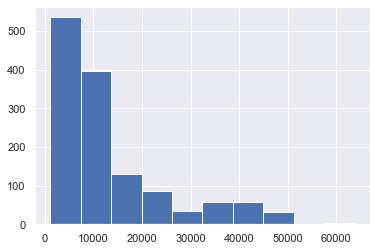

In [12]:
insurance_df['charges'].hist()

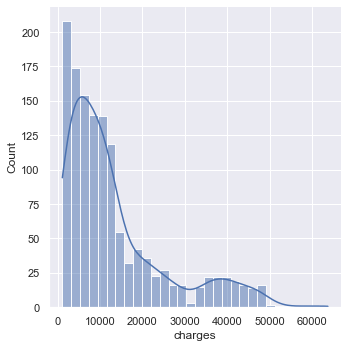

In [34]:
sns.displot(data=insurance_df, x='charges', kde=True)

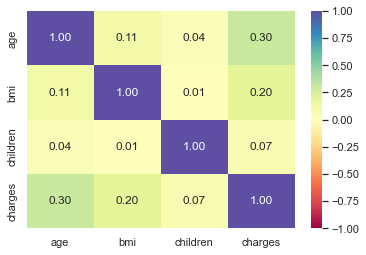

In [13]:
sns.heatmap(
    insurance_df.select_dtypes(exclude=['object']).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [14]:
X = insurance_df.drop(['charges'],axis=1)
Y = insurance_df['charges']

In [15]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [16]:
# splitting the data in 70:30 ration for training

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [17]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 936
Number of rows in test data = 402


In [18]:
charges_linregmodel = LinearRegression()
charges_linregmodel.fit(x_train,y_train)

LinearRegression()

In [19]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [20]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(charges_linregmodel, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6039.601871,4154.405109,0.754556,0.752438,42.246385


In [31]:
# Calculation of Explained Variance
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
print((cross_val_score(charges_linregmodel, X, Y, scoring="explained_variance")))

[0.76215457 0.70741761 0.77935884 0.73269917 0.75659642]


In [32]:
from sklearn.metrics import mean_absolute_error
y_pred = charges_linregmodel.predict(x_test) 
mean_absolute_error(y_test, y_pred)

4139.9320647660115

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
X_transform = poly.fit_transform(X)

In [24]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_transform, Y, test_size=0.3, random_state=1)

In [25]:
charges_linregmodel_trans = LinearRegression()
charges_linregmodel_trans.fit(x_train_2,y_train_2)

LinearRegression()

In [26]:
# Checking model performance on train set
print("Training Performance\n")
lrm_train_perf_trans = model_performance_regression(charges_linregmodel_trans, x_train_2, y_train_2)
lrm_train_perf_trans

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4828.42465,2960.576921,0.843127,0.836664,29.336716
